# Understanding Descriptive Statistics

Import the necessary libraries here:

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [54]:
# your code here
ten_random = random.choices([1,2,3,4,5,6], weights=None, cum_weights=None, k=10)
df = pd.DataFrame(ten_random,columns=["Outcome"])
df_backup=df.copy()
df

,Outcome
0,3
1,1
2,1
3,4
4,2
5,2
6,1
7,2
8,3
9,5


#### 2.- Plot the results sorted by value.

,# of Times
Outcome,
1,3
2,3
3,2
4,1
5,1


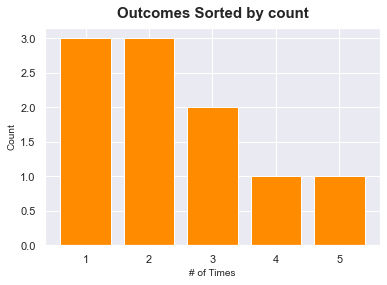

In [55]:
# your code here
'''
PLOT 1
Sorted by value counts
'''
df_sorted = df.groupby("Outcome")[['Outcome']].count().rename(columns={"Outcome":"# of Times"}).sort_values(by="# of Times",ascending=False)
plt.bar(df_sorted["# of Times"].index,df_sorted["# of Times"],color="darkorange")
plt.title("Outcomes Sorted by count",size=15,pad=10,fontweight="bold")
plt.xlabel("# of Times",size=10)
plt.ylabel("Count",size=10)
df_sorted

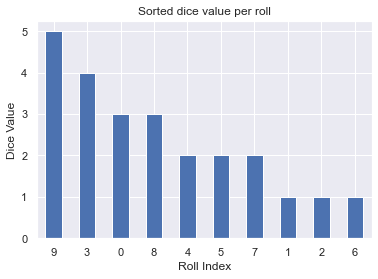

In [56]:
#paolo: here requested plot ( ordered by value plotting each dice roll) was  bit different- check here and solution
sorted_dice_results = df.sort_values(by="Outcome", ascending=False)
sorted_dice_results.Outcome.plot(kind='bar', legend=None, rot=0)
plt.xlabel('Roll Index')
plt.ylabel('Dice Value')
plt.title('Sorted dice value per roll')
plt.show()

,Outcome
1,2
2,6
3,3
4,5
5,3
6,2
7,4
8,2
9,4
10,2


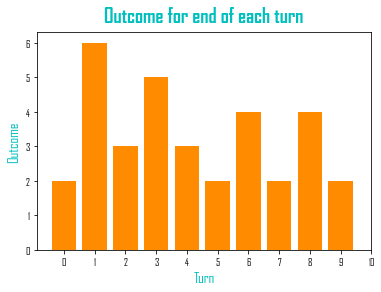

In [4]:
'''
PLOT 2
Plot was sorted by outcomes for each dice
'''
df_sorted=df.copy()
df_sorted = df_sorted.sort_values("Outcome",inplace=False)


df_sorted.reset_index()
df.index = np.arange(1, len(df)+1)

plt.rcParams["font.family"]="agency fb"
plt.bar(df_sorted["Outcome"].index,df_sorted["Outcome"],color="darkorange")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.xlabel("Turn",size=15,c="c")
plt.ylabel("Outcome",size=15,c="c")
plt.title("Outcome for end of each turn",pad=10,size=20,fontweight="bold",color="c")
#plt.grid(True,c="k")
df

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

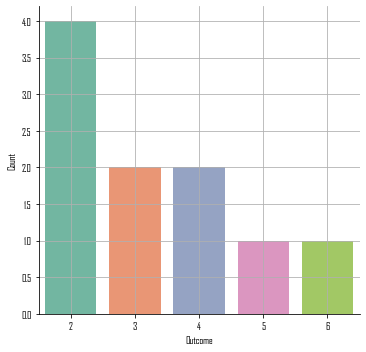

In [5]:
# your code here

df = df_backup.copy()
sns.catplot(data=df,x="Outcome",kind="count",palette="Set2")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.grid(True)

In [6]:
"""
The first plot was drawn based on number of outcomes. So that those two plots are same.
If we compare with PLOT 2, then we can say that frequency plot shows sum of each outcome on PLOT 2.
"""

'\nThe first plot was drawn based on number of outcomes. So that those two plots are same.\nIf we compare with PLOT 2, then we can say that frequency plot shows sum of each outcome on PLOT 2.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
df = df_backup.copy()

# your code here
def mean_calc(data):
    return data.sum()/len(data)

df.apply(mean_calc)

Outcome    3.3
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here

#Frequency distri. added under a new column called "Count"
df["Count"] = df["Outcome"].value_counts()

# Calculating Mean
df_mean = (df["Outcome"].sum()) / (df["Count"].sum())
df_mean

3.3

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [9]:
# your code here
def median_calc(data,column):
    return data.apply(lambda x: data[column].sum()/len(data[column]))

median_calc(df,"Outcome")

Outcome    3.3
Count      3.3
dtype: float64

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [10]:
lst = df_sorted["Outcome"]
def find_median(lst):
    indices = []
    size = len(lst)
    median = 0

    if size % 2 == 0:
        indices.append(int(size / 2) - 1)  # -1 because index starts from 0
        indices.append(int(size / 2))

        median = (lst[indices[0]] + lst[indices[1]]) / 2
        pass
    else:
        indices.append(int(size / 2))

        median = lst[indices[0]]
        pass

    return median, indices
    pass

lst=list(lst)
median, median_indices = find_median(lst)
Q1, Q1_indices = find_median(lst[:median_indices[0]])
Q2, Q2_indices = find_median(lst[median_indices[-1] + 1:])

quartiles = [Q1, median, Q2]

print("(Q1, median, Q3): {}".format(quartiles))


(Q1, median, Q3): [2.0, 3.0, 4.5]


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from [here](https://drive.google.com/file/d/1mDz-pl6Dpp0fvrXqkFTosuaW3mw6tfWP/view?usp=sharing), place it in the `data` folder and load it
#### 1.- Sort the values and plot them. What do you see?

In [11]:
# your code here
data = pd.read_csv("../data/roll_the_dice_hundred.csv",index_col="Unnamed: 0")
data_backup=data.copy()

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [12]:
# your code here
data_sorted = data.sort_values(by="value")

def median_calc(data,column):
    if len(data)%2==0:
        return data.apply(lambda x: data[column].sum()/len(data[column]))

median_calc(data_sorted,"value")

roll     3.74
value    3.74
dtype: float64

#### 3.- Now, calculate the frequency distribution.


In [13]:
# your code here
data["value"].value_counts()

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

Text(0.5, 1.0, '100 Dice Outcome - Histogram')

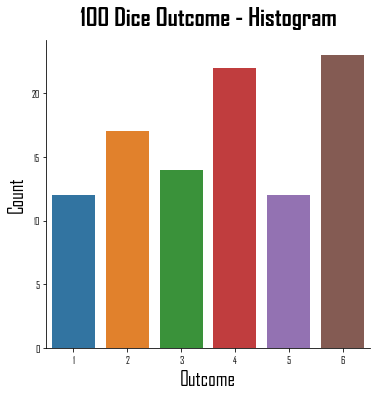

In [14]:
# your code here
sns.catplot(data=data,x="value",kind="count")
plt.xlabel("Outcome",size=20)
plt.ylabel("Count",size=20)
plt.title("100 Dice Outcome - Histogram",size=25,fontweight="bold",pad=15)

In [15]:
"""
So, if we look right side of the graph, we see that their counts are much higher then left side of the
graph. Based on that, we can say that median was expected to be definitely higher than 3, where we
already found median as 3.74

Sum of all counts are equal to shape of our dataframe, which also was expected since for each outcome
there is one count.
"""
#paolo: what is theoretical mean (in case the frequency was the same
# for all values) and what is the actual mean in this case?
#if there is a difference why is the case?

'\nSo, if we look right side of the graph, we see that their counts are much higher then left side of the\ngraph. Based on that, we can say that median was expected to be definitely higher than 3, where we\nalready found median as 3.74\n\nSum of all counts are equal to shape of our dataframe, which also was expected since for each outcome\nthere is one count.\n'

#### 5 Read the `roll_the_dice_thousand.csv` from <br> 
[here](https://drive.google.com/file/d/1zYzEcKL1tA69WCACG8WhTEr7m9fojClZ/view?usp=sharing), place it in the `data` folder and load it. 
Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [16]:
data_thousand = pd.read_csv("../data/roll_the_dice_thousand.csv",index_col="Unnamed: 0")

Mean of thousand dices is:  roll     3.447
value    3.447
dtype: float64


Text(0.5, 1.0, '1000 Dice Outcome - Histogram')

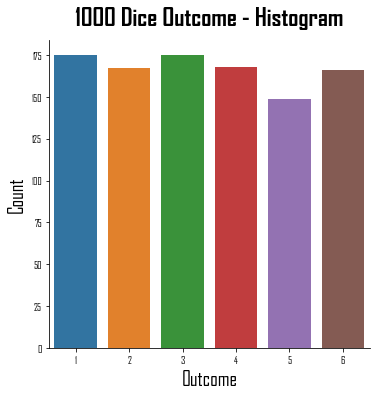

In [17]:
# your code here
data_thousand = pd.read_csv("../data/roll_the_dice_thousand.csv",index_col="Unnamed: 0")

def median_calc(data,column):
    if len(data)%2==0:
        return data.apply(lambda x: data[column].sum()/len(data[column]))

print("Mean of thousand dices is: ",median_calc(data_thousand,"value"))

sns.catplot(data=data_thousand,kind="count",x="value")
plt.xlabel("Outcome",size=20)
plt.ylabel("Count",size=20)
plt.title("1000 Dice Outcome - Histogram",size=25,fontweight="bold",pad=15)

In [18]:
"""
Since we have increased the sample size, mean value of the sample get closer to the mean of 3.5 (21/6)

The more rolls we throw, the closer the value is likely to be to exactly 3.5.

"""

'\nSince we have increased the sample size, mean value of the sample get closer to the mean of 3.5 (21/6)\n\nThe more rolls we throw, the closer the value is likely to be to exactly 3.5.\n\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`

from [here](https://drive.google.com/file/d/1sHr5-fnvn9oBvxu3tlR4ANCnQHDV-bUc/view?usp=sharing), place it in the data folder and load it. <br>
Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

'\nWell, according to the graph, mean should be between 35-40.. \nRange 1-80, looks like there are quite difference between datapoints so I am expecting std dev. to be\nrelatively high..\n'

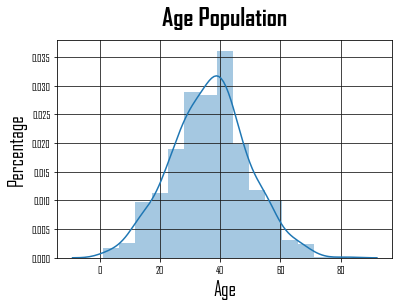

In [19]:
# your code here
ages = pd.read_csv("../data/ages_population.csv")

sns.distplot(ages,bins=15)
sns.set()
plt.grid(True,c="k")
plt.xlabel("Age",size=20)
plt.ylabel("Percentage",size=20)
plt.title("Age Population",size=25,fontweight="bold",pad=15)

'''
Well, according to the graph, mean should be between 35-40.. 
Range 1-80, looks like there are quite difference between datapoints so I am expecting std dev. to be
relatively high..
'''

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [20]:
# your code here
ages.mean()
ages.std()
print("Mean of age dataset is: ",ages.mean())
print("Std. deviation of age dataset is: ",ages.std())

Mean of age dataset is:  observation    36.56
dtype: float64
Std. deviation of age dataset is:  observation    12.8165
dtype: float64


In [21]:
"""
As I expected, mean is 36.56 which is between 35-40 and we can not say whether std dev. is high
or low, but in normal circumstances I would say this std dev is quitehigh with result of 12.81.
"""

'\nAs I expected, mean is 36.56 which is between 35-40 and we can not say whether std dev. is high\nor low, but in normal circumstances I would say this std dev is quitehigh with result of 12.81.\n'

#### 3.- Now read the file `ages_population2.csv` 
from [here](https://drive.google.com/file/d/1RWGflLnwLOgZICUnrc9COzj3qcUeJP0X/view?usp=sharing) place it in the data folder and load it.  Calculate the frequency distribution and plot it.

Text(0.5, 1.0, 'Age Population')

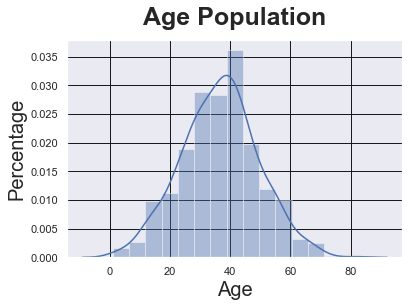

In [22]:
# your code here
ages_2 = pd.read_csv("../data/ages_population2.csv")
sns.distplot(ages,bins=15)
sns.set()
plt.grid(True,c="k")
plt.xlabel("Age",size=20)
plt.ylabel("Percentage",size=20)
plt.title("Age Population",size=25,fontweight="bold",pad=15)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [23]:
"""
Well, mean of this DF is smaller than previous example.
Range: 19-37, std should be much lower than previous example.
"""

'\nWell, mean of this DF is smaller than previous example.\nRange: 19-37, std should be much lower than previous example.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [24]:
# your code here
ages_2.mean()
ages_2.std()

observation    2.969814
dtype: float64

In [25]:
"""
Mean: 27.15
Std. deviation: 2.96

As expected, std deviation is much lower and also mean is a bit lower than first dataset.
"""

'\nMean: 27.15\nStd. deviation: 2.96\n\nAs expected, std deviation is much lower and also mean is a bit lower than first dataset.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv` 
from [here](https://drive.google.com/file/d/1knUGLeVUADYUXYqq_Ap48oTtLKkjHCNv/view?usp=sharing) and place it in the data folder. Calculate the frequency distribution and plot it.

<AxesSubplot:>

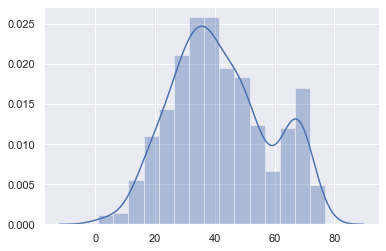

In [26]:
# your code here
ages_3 = pd.read_csv("../data/ages_population3.csv")
sns.distplot(ages_3,bins=15)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [27]:
# your code here
print("Mean: ",ages_3.mean())
print("Std Dev: ",ages_3.std())
print("\n")
print("Mean: ",ages.mean())
print("Std Dev: ",ages.std())

Mean:  observation    41.989
dtype: float64
Std Dev:  observation    16.144706
dtype: float64


Mean:  observation    36.56
dtype: float64
Std Dev:  observation    12.8165
dtype: float64


In [28]:
"""

Data points are mainly fall into two parts in this data frame, one around 30-45 range, the other 
around 60-75 range, therefore it is expected that mean value should be somewhere between those two.

As mean score of 41, this dataframe's mean is indeed higher than previous 2.

Also, even range is similar with the first DF in this one, there are more data points available 
distant from each other, therefore std. deviation is also higher with compared to first plot. In 
other words also means that people ages are more dispersed in this dataset.
"""

"\n\nData points are mainly fall into two parts in this data frame, one around 30-45 range, the other \naround 60-75 range, therefore it is expected that mean value should be somewhere between those two.\n\nAs mean score of 41, this dataframe's mean is indeed higher than previous 2.\n\nAlso, even range is similar with the first DF in this one, there are more data points available \ndistant from each other, therefore std. deviation is also higher with compared to first plot. In \nother words also means that people ages are more dispersed in this dataset.\n"

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [29]:
# your code here
ages_3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [30]:
ages.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [31]:
"""
There's a small skewnewss in both dataframes. Skewnewss is much obvious in the second dataset,
since differnece between mean value and median value is bigger.

Both graph has negative skewnewss since median values are bigger than mean values which means that
more data points are available on the right side of the mean.

Also, quartile ranges are higher for the ages3 dataset rather than first dataset.
"""

"\nThere's a small skewnewss in both dataframes. Skewnewss is much obvious in the second dataset,\nsince differnece between mean value and median value is bigger.\n\nBoth graph has negative skewnewss since median values are bigger than mean values which means that\nmore data points are available on the right side of the mean.\n\nAlso, quartile ranges are higher for the ages3 dataset rather than first dataset.\n"

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

<AxesSubplot:>

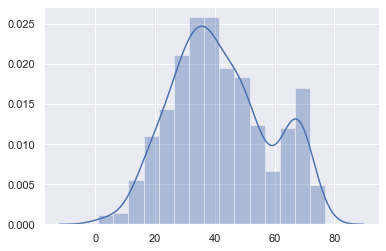

In [32]:
# your code here
sns.distplot(ages_3,bins=15)

In [33]:
ages_3.quantile([0.4,0.5,0.7,0.8,0.85,0.9,1])

,observation
0.40,36.0
0.50,40.0
0.70,50.0
0.80,57.0
0.85,64.0
0.90,67.0
1.00,77.0


In [34]:
"""
Even though mean:40 , median:41 for ages_3 df, it can be seen that more than 80% of data is 
available left side of the second curve.
"""

'\nEven though mean:40 , median:41 for ages_3 df, it can be seen that more than 80% of data is \navailable left side of the second curve.\n'

In [37]:
#paolo: check ok- good plotting and good reasoning

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [35]:
# your code here

In [36]:
"""
your comments here
""" 

'\nyour comments here\n'